In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# načítanie súborov
connections = pd.read_csv("raw_data/connections.csv", delimiter="\t")
devices = pd.read_csv("raw_data/devices.csv", delimiter="\t")
processes = pd.read_csv("raw_data/processes.csv", delimiter="\t")
profiles = pd.read_csv("raw_data/profiles.csv", delimiter="\t")

## Posledne zmeny v sekcii: B
 - Pridane univariate analýzy pre vybrane columny
 - Tie columny som nakoniec vybral tak, že som urobil kopie povodnych df, čiže tie povodne df su stale available
 - Tieto kopie som mergol pomocou toho postupu co si robil predtym ty
 - Mode mi este nefunguje, neviem preco
 - -----------------------------------
 - pridanie štatistík aj pre kategorické dáta
 - menšie úpravy v premenných

# 1.1 Základný opis dát spolu s ich charakteristikami

## A

Analýza štruktúr dát ako súbory (štruktúry a vzťahy, počet, typy, …), záznamy
(štruktúry, počet záznamov, počet atribútov, typy, …)

### Connections

In [ ]:
connections.head()

In [ ]:
connections.shape

In [ ]:
connections.columns

In [ ]:
connections.dtypes

In [ ]:
connections.isnull().sum()

In [ ]:
connections.shape[0] - connections.dropna().shape[0]

In [ ]:
connections.info()

### Devices

In [ ]:
devices.head()

In [ ]:
devices.shape

In [ ]:
devices.columns

In [ ]:
devices.dtypes

In [ ]:
devices.isnull().sum()

In [ ]:
devices.shape[0] - devices.dropna().shape[0]

In [ ]:
devices.info()

### Processes

In [ ]:
processes.head()

In [ ]:
processes.shape

In [ ]:
processes.columns

In [ ]:
processes.dtypes

In [ ]:
processes.isnull().sum()

In [ ]:
processes.shape[0] - processes.dropna().shape[0]

In [ ]:
processes.info()

### Profiles

In [ ]:
profiles.head()

In [ ]:
profiles.shape

In [ ]:
profiles.columns

In [ ]:
profiles.dtypes

In [ ]:
profiles.isnull().sum()

In [ ]:
profiles.shape[0] - profiles.dropna().shape[0]

In [ ]:
profiles.info()

## B

Analýza jednotlivých atribútov: pre zvolené významné atribúty (min 10) analyzujte
ich distribúcie a základné deskriptívne štatistiky.

### Výber relevantných stĺpcov

In [3]:
columns_to_drop = ["c.android.vending", "c.raider", "c.UCMobile.intl"]
relevant_connections = connections.drop(columns=columns_to_drop)
columns_to_drop = ["latitude", "longitude"]
relevant_devices = devices.drop(columns=columns_to_drop)
columns_to_drop = ["p.inputmethod.latin", "p.simulator", "p.android.gms", "p.android.vending", "p.katana", "p.process.gapps", "p.google", "p.olauncher", "p.browser.provider"]
relevant_processes = processes.drop(columns=columns_to_drop)
columns_to_drop = ["birthdate", "user_id", "registration", "job", "mail", "residence", "current_location", "username", "ssn", "name"]
relevant_profiles = profiles.drop(columns=columns_to_drop)

merged_con_dev = pd.merge(relevant_connections, relevant_devices, on="imei", how="outer")
merged_con_dev_proc = pd.merge(merged_con_dev, relevant_processes, on=["imei", "mwra", "ts"], how="outer")
merged_data = pd.merge(merged_con_dev_proc, relevant_profiles, on="imei", how="outer")

numeric_columns = [
    'c.dogalize', 'c.android.gm', 'c.android.chrome', 
    'c.android.youtube', 'c.katana', 'c.updateassist', 
    'c.UCMobile.x86', 'p.android.gm', 'p.android.externalstorage', 
    'p.android.documentsui', 'p.system', 'p.android.settings', 
    'p.android.packageinstaller', 'p.android.chrome', 
    'p.android.defcontainer', 'p.gms.persistent', 
    'p.notifier', 'p.dogalize'
]

categorical_columns = [
    "ts", "store_name", "code", "location", "company"
]

columns = numeric_columns + categorical_columns

### Počty kategorických stĺpcov

In [4]:
for col in categorical_columns:
    print(merged_data[col].value_counts())
    print("\n")

ts
2018-05-14 13:43:00    384
2018-05-08 17:55:00    288
2018-05-13 05:43:00    288
2018-05-15 09:37:00    288
2018-05-14 06:23:00    288
                      ... 
2018-05-05 11:54:00      1
2018-05-14 18:47:00      1
2018-05-11 04:21:00      1
2018-05-10 05:28:00      1
2018-05-10 17:51:00      1
Name: count, Length: 14903, dtype: int64


store_name
Zacoalco de Torres    1592
Mokopane              1590
Moga                  1528
Hudiksvall            1477
Jalal-Abad            1433
                      ... 
Lodwar                  46
Carlos Barbosa          44
Landshut                31
Ushuaia                 29
Barbil                  29
Name: count, Length: 917, dtype: int64


code
US    74987
IN    32747
RU    25388
DE    23998
BR    19107
      ...  
DO      112
HN      104
RW       96
GM       88
PG       80
Name: count, Length: 133, dtype: int64


location
America/New_York             32899
Asia/Kolkata                 32747
Europe/Berlin                23998
America/Chicago 

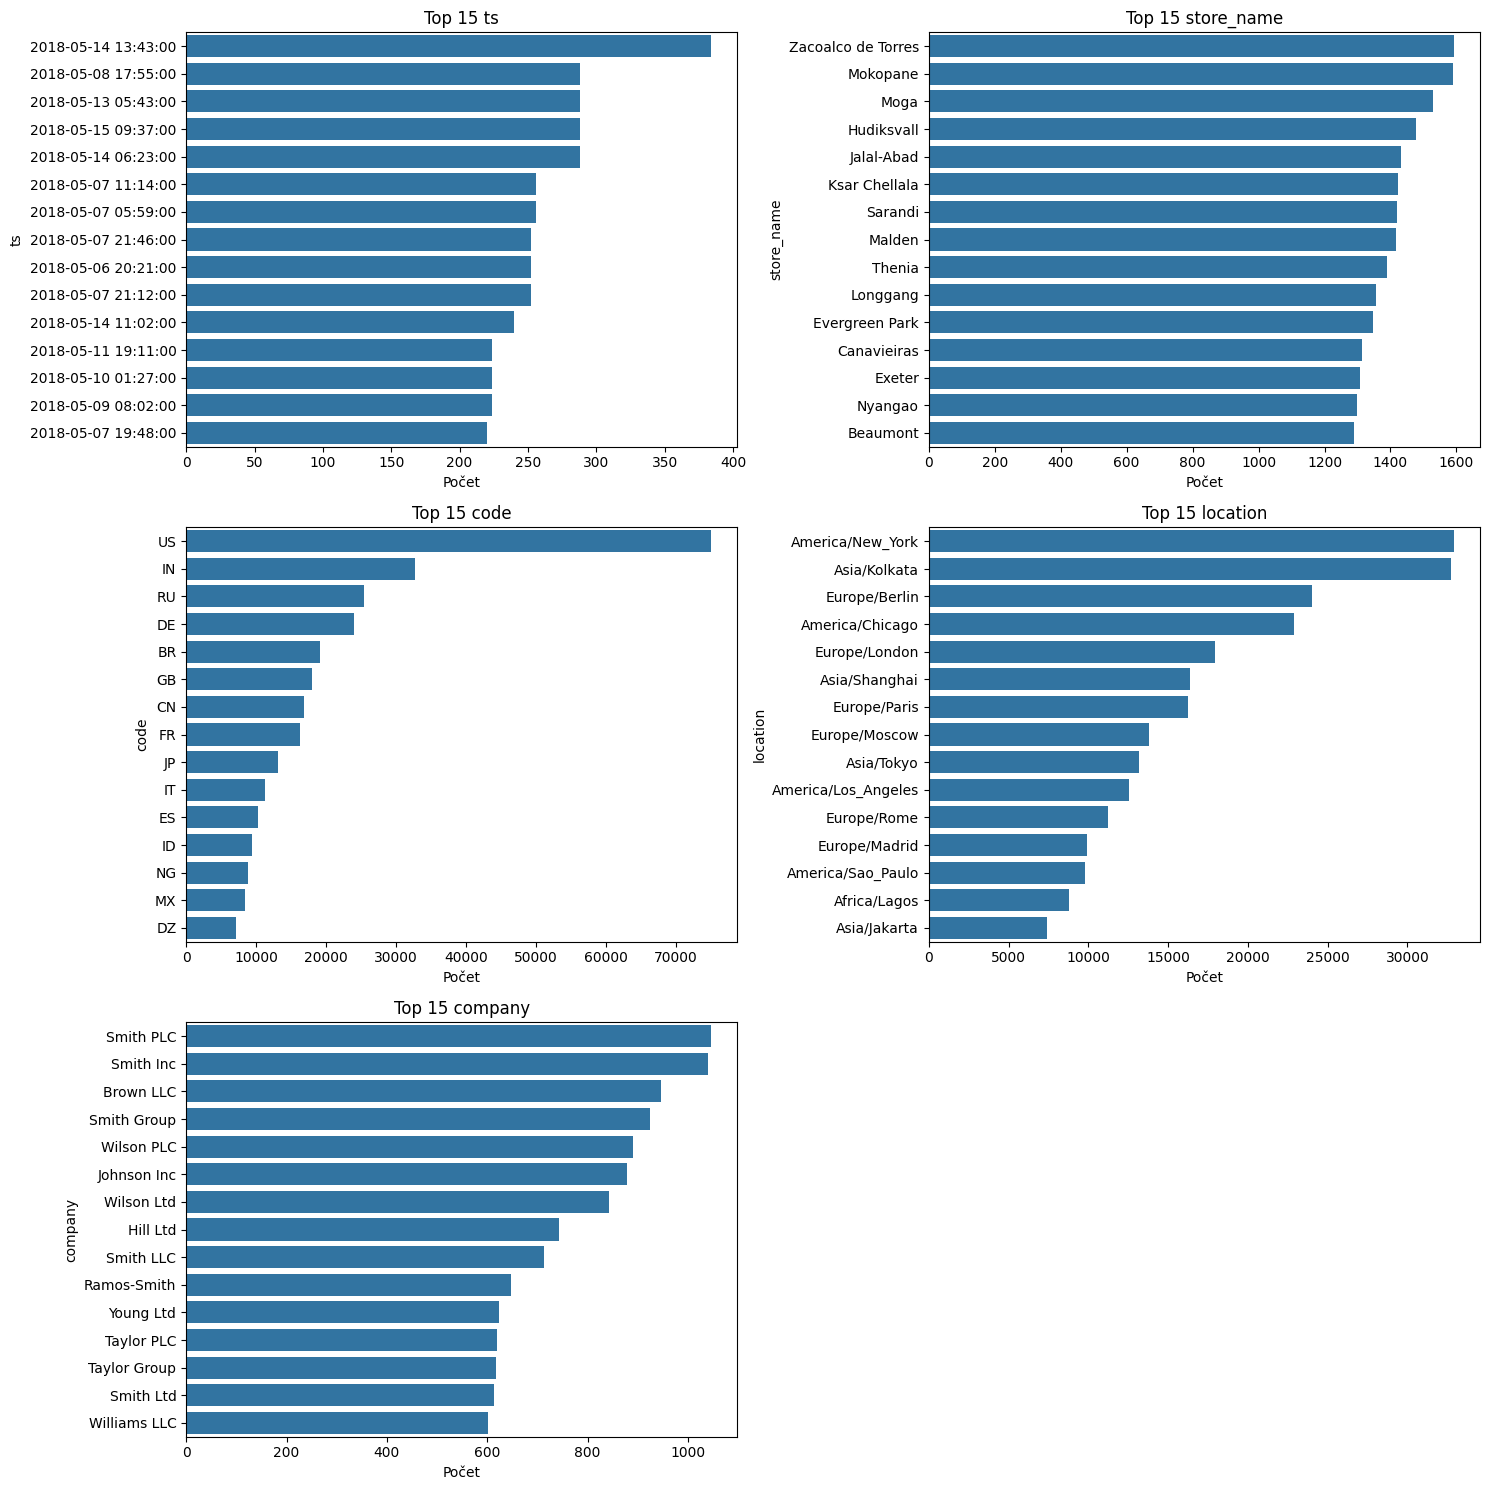

In [5]:
num_plots = len(categorical_columns)
num_cols = 2
num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(y=col, data=merged_data, order=merged_data[col].value_counts().index[:15], ax=axes[i])
    axes[i].set_title(f'Top 15 {col}')
    axes[i].set_xlabel('Počet')
    axes[i].set_ylabel(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Histogramy pre numerické stĺpce 

array([[<Axes: title={'center': 'imei'}>,
        <Axes: title={'center': 'mwra'}>,
        <Axes: title={'center': 'c.dogalize'}>,
        <Axes: title={'center': 'c.android.gm'}>],
       [<Axes: title={'center': 'c.android.chrome'}>,
        <Axes: title={'center': 'c.android.youtube'}>,
        <Axes: title={'center': 'c.katana'}>,
        <Axes: title={'center': 'c.updateassist'}>],
       [<Axes: title={'center': 'c.UCMobile.x86'}>,
        <Axes: title={'center': 'p.android.gm'}>,
        <Axes: title={'center': 'p.android.externalstorage'}>,
        <Axes: title={'center': 'p.android.documentsui'}>],
       [<Axes: title={'center': 'p.system'}>,
        <Axes: title={'center': 'p.android.settings'}>,
        <Axes: title={'center': 'p.android.packageinstaller'}>,
        <Axes: title={'center': 'p.android.chrome'}>],
       [<Axes: title={'center': 'p.android.defcontainer'}>,
        <Axes: title={'center': 'p.gms.persistent'}>,
        <Axes: title={'center': 'p.notifier'}>,
 

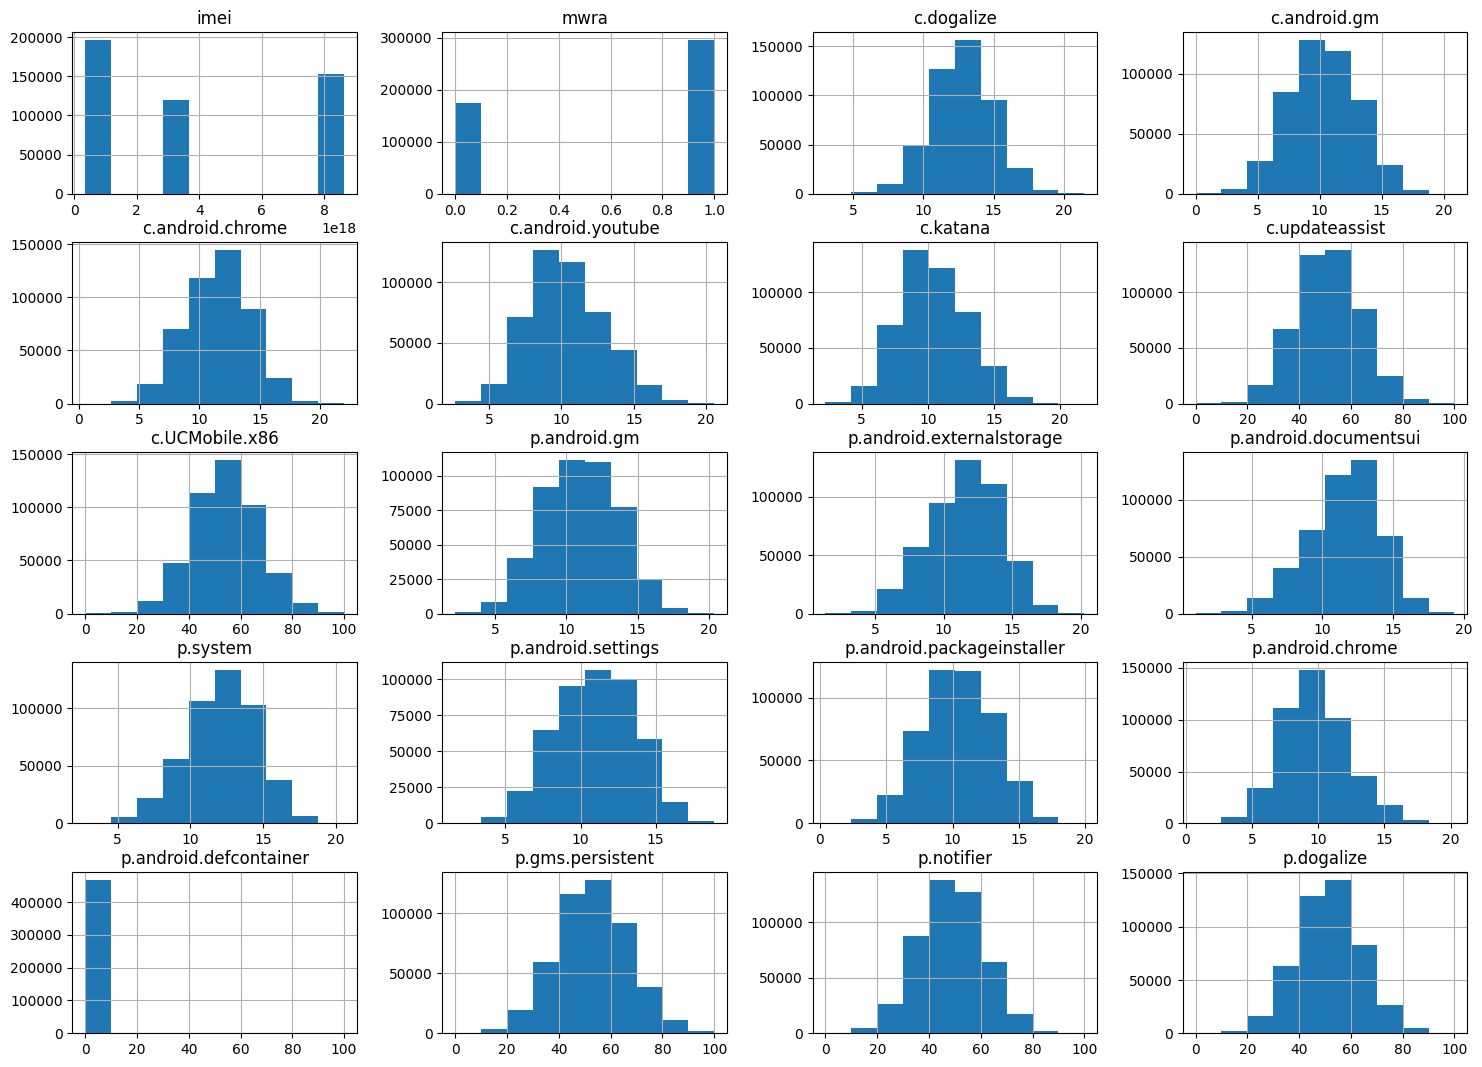

In [6]:
merged_data.hist(bins=10, figsize=(18, 13))

### Mean, Median & Mode

In [7]:
for column in numeric_columns:
    mean_value = round(np.mean(merged_data[column]), 3)
    median_value = round(np.median(merged_data[column]), 3)
    mode_result = stats.mode(merged_data[column].dropna())
    try:
        mode_value = mode_result.mode[0]
    except IndexError: 
        mode_value = None
    mode_display = mode_value if mode_value is not None else "N/A"
    print(f"{column:30} -> Mean: {mean_value:>8}, Median: {median_value:>8}, Mode: {mode_display:>8}")

c.dogalize                     -> Mean:   12.784, Median:   12.809, Mode:      N/A
c.android.gm                   -> Mean:   10.323, Median:   10.279, Mode:      N/A
c.android.chrome               -> Mean:   11.502, Median:   11.617, Mode:      N/A
c.android.youtube              -> Mean:   10.335, Median:   10.084, Mode:      N/A
c.katana                       -> Mean:   10.387, Median:   10.208, Mode:      N/A
c.updateassist                 -> Mean:   51.252, Median:   51.144, Mode:      N/A
c.UCMobile.x86                 -> Mean:   54.149, Median:    54.06, Mode:      N/A
p.android.gm                   -> Mean:   10.973, Median:   11.003, Mode:      N/A
p.android.externalstorage      -> Mean:   11.533, Median:   11.769, Mode:      N/A
p.android.documentsui          -> Mean:   11.532, Median:   11.804, Mode:      N/A
p.system                       -> Mean:   12.162, Median:    12.29, Mode:      N/A
p.android.settings             -> Mean:   10.987, Median:   11.039, Mode:      N/A
p.an

In [8]:
for column in categorical_columns:
    mode_result = merged_data[column].dropna().mode()
    try:
        mode_value = mode_result[0]
    except IndexError: 
        mode_value = None
    mode_display = mode_value if mode_value is not None else "N/A"
    print(f"{column:10} -> Mode: {mode_display:>8}")

ts         -> Mode: 2018-05-14 13:43:00
store_name -> Mode: Zacoalco de Torres
code       -> Mode:       US
location   -> Mode: America/New_York
company    -> Mode: Smith PLC


### Skewness & Kurtosis

In [9]:
# Funkcia pre automaticke vyhodnotenie skewness
def evaluate_skewness(skewness: float) -> str:
    if -0.5 <= skewness <= 0.5:
        return "Fairly symmetrical"
    elif -1 < skewness < -0.5 or 0.5 < skewness < 1:
        return "Moderately skewed"
    elif skewness <= -1 or skewness >= 1:
        return "Highly skewed"
    else:
        return "Invalid value."

# Funkcia pre automaticke vyhodnotenie kurtosis
def evaluate_kurtosis(kurtosis: float) -> str:
    if kurtosis > 3:
        return "Kurtosis is positive."
    elif kurtosis < 3:
        return "Kurtosis is negative."


In [10]:
for column in numeric_columns:
    skewness_value = round(stats.skew(merged_data[column]), 3)
    kurtosis_value = round(stats.kurtosis(merged_data[column]), 3)
    skewness_eval = evaluate_skewness(skewness_value)
    kurtosis_eval = evaluate_kurtosis(kurtosis_value)
    
    print(f"Skewness: {skewness_value:>8} -> {skewness_eval:<18}, Kurtosis: {kurtosis_value:>8} -> {kurtosis_eval}")

Skewness:   -0.046 -> Fairly symmetrical, Kurtosis:    0.187 -> Kurtosis is negative.
Skewness:   -0.008 -> Fairly symmetrical, Kurtosis:   -0.295 -> Kurtosis is negative.
Skewness:    -0.12 -> Fairly symmetrical, Kurtosis:   -0.235 -> Kurtosis is negative.
Skewness:    0.357 -> Fairly symmetrical, Kurtosis:   -0.109 -> Kurtosis is negative.
Skewness:    0.199 -> Fairly symmetrical, Kurtosis:   -0.242 -> Kurtosis is negative.
Skewness:    0.033 -> Fairly symmetrical, Kurtosis:   -0.002 -> Kurtosis is negative.
Skewness:   -0.013 -> Fairly symmetrical, Kurtosis:    0.076 -> Kurtosis is negative.
Skewness:   -0.026 -> Fairly symmetrical, Kurtosis:   -0.441 -> Kurtosis is negative.
Skewness:   -0.231 -> Fairly symmetrical, Kurtosis:   -0.302 -> Kurtosis is negative.
Skewness:   -0.394 -> Fairly symmetrical, Kurtosis:   -0.098 -> Kurtosis is negative.
Skewness:    -0.26 -> Fairly symmetrical, Kurtosis:    -0.06 -> Kurtosis is negative.
Skewness:   -0.087 -> Fairly symmetrical, Kurtosis:   

## C

In [ ]:
#sns.pairplot(connections)
#plt.tight_layout()
#plt.show()

In [ ]:
#sns.pairplot(devices)
#plt.tight_layout()
#plt.show()

In [ ]:
#sns.pairplot(processes)
#plt.tight_layout()
#plt.show()

In [ ]:
sns.pairplot(profiles)
plt.tight_layout()
plt.show()

## D

In [ ]:
#merged_con_dev = pd.merge(connections, devices, on="imei", how="outer")
#merged_con_dev_proc = pd.merge(merged_con_dev, processes, on=["imei", "mwra"], how="outer")
#merged_data = pd.merge(merged_con_dev_proc, profiles, on="imei", how="inner")
#merged_data.head()

In [ ]:
#cars_numeric = cars.drop(columns=['abbrev'])
#numeric_columns = merged_data.select_dtypes(include='number')
#corr_matrix = numeric_columns.corr()

#plt.figure(figsize=(18, 14))
#sns.heatmap(corr_matrix, annot=True,  fmt='.2f', cmap="coolwarm", center=0, annot_kws={"size": 8})
#plt.show()

## E

# 1.2 Identifikácia problémov, integrácia a čistenie dát

## A

## B

## C

# 1.3 Formulácia a štatistické overenie hypotéz o dátach

## A

## B